# Explore here

In [335]:
# Your code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

flu_df = pd.read_csv('../data/raw/fluview_data.csv', delimiter=',', encoding='utf-8')
cases_states = pd.read_csv("../data/raw/fluview_data_by_state.csv", delimiter=',', encoding='utf-8')
temps = pd.read_csv("../data/raw/temperaturas_estados_usa.csv", delimiter=',', encoding='utf-8')

In [336]:
cases_states['state'] = cases_states['state'].str.lower()
temps['state'] = temps['Estado'].str.lower()
temps = temps.rename(columns={"year_week": "epiweek"})
flu_df['state'] = flu_df['region'].str.lower()

# Step 1: Join 'cases_states' and 'temps' by 'state' and 'epiweek'
state_temp_df = pd.merge(cases_states, temps, how="outer", on=["state", "epiweek"])

# Step 2: Join the result with fluview by 'state' by 'epiweek'
final_df = pd.merge(state_temp_df, flu_df, how="outer", on=["state", "epiweek"])

final_df = final_df.drop(columns=["wili_y", "ili_y", "num_age_1_y", "num_age_2_y",
                                  "num_age_3_y","num_age_4_y","num_age_5_y",
                                  "num_patients_y","num_ili_y","release_date_y",
                                  "issue_y", "region_y", "lag_y",
                                  "num_providers_y", "num_age_0_y"], errors="ignore")
final_df = final_df.rename(columns={
    "release_date_x": "release_date",
    "region_x": "region",
    "issue_x": "issue",
    "lag_x": "lag",
    "num_providers_x": "num_providers",
    "num_age_0_x": "num_age_0",
    "num_ili_x": "num_ili",
    "num_patients_x": "num_patients",
    "num_age_1_x": "num_age_1",
    "num_age_2_x": "num_age_2",
    "num_age_3_x": "num_age_3",
    "num_age_4_x": "num_age_4",
    "num_age_5_x": "num_age_5",
    "ili_x": "ili",
    "wili_x": "wili",
})

final_df.head()

,release_date,region,issue,epiweek,lag,num_ili,num_patients,num_providers,num_age_0,num_age_1,num_age_2,num_age_3,num_age_4,num_age_5,wili,ili,state,Estado,temperature_2m_mean,apparent_temperature_mean
0,2017-10-24,ak,201740.0,201040,365.0,15.0,1714.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.875146,0.875146,ak,NaN,NaN,NaN
1,2017-10-24,ak,201740.0,201041,364.0,19.0,1684.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.128270,1.128270,ak,NaN,NaN,NaN
2,2017-10-24,ak,201740.0,201042,363.0,11.0,1877.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.586042,0.586042,ak,NaN,NaN,NaN
3,2017-10-24,ak,201740.0,201043,362.0,18.0,1860.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,0.967742,0.967742,ak,NaN,NaN,NaN
4,2017-10-24,ak,201740.0,201044,361.0,13.0,1901.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,0.683851,0.683851,ak,NaN,NaN,NaN


In [337]:
final_df.tail()

,release_date,region,issue,epiweek,lag,num_ili,num_patients,num_providers,num_age_0,num_age_1,num_age_2,num_age_3,num_age_4,num_age_5,wili,ili,state,Estado,temperature_2m_mean,apparent_temperature_mean
91227,NaN,NaN,NaN,202500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wyoming,Wyoming,27.944582,32.740875
91228,NaN,NaN,NaN,202501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wyoming,Wyoming,27.610416,31.967476
91229,NaN,NaN,NaN,202502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wyoming,Wyoming,27.556845,31.826761
91230,NaN,NaN,NaN,202503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wyoming,Wyoming,27.255655,31.149420
91231,NaN,NaN,NaN,202504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wyoming,Wyoming,27.184374,31.386020


In [338]:
mismatched_states = final_df[final_df["state"] != final_df["Estado"]]
print(mismatched_states[["state", "Estado"]])

         state   Estado
0           ak      NaN
1           ak      NaN
2           ak      NaN
3           ak      NaN
4           ak      NaN
...        ...      ...
91227  wyoming  Wyoming
91228  wyoming  Wyoming
91229  wyoming  Wyoming
91230  wyoming  Wyoming
91231  wyoming  Wyoming

[91232 rows x 2 columns]


In [339]:
final_df["Estado"] = final_df["Estado"].fillna(final_df["state"])
final_df["state"] = final_df["state"].str.lower()
final_df["Estado"] = final_df["Estado"].str.lower()
mismatched_states = final_df[final_df["state"] != final_df["Estado"]]
print(mismatched_states[["state", "Estado"]])


Empty DataFrame
Columns: [state, Estado]
Index: []


In [340]:
final_df = final_df.drop(columns=["Estado"], errors="ignore")

In [341]:
print(final_df["region"].unique())


['ak' 'al' nan 'ar' 'az' 'ca' 'co' 'ct' 'de' 'fl' 'ga' 'hi' 'ia' 'id' 'il'
 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc' 'nd'
 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd' 'tn'
 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv' 'wy']


In [342]:
print(final_df["state"].unique())

['ak' 'al' 'alabama' 'alaska' 'ar' 'arizona' 'arkansas' 'az' 'ca'
 'california' 'co' 'colorado' 'connecticut' 'ct' 'de' 'delaware' 'fl'
 'florida' 'ga' 'georgia' 'hawaii' 'hhs1' 'hhs10' 'hhs2' 'hhs3' 'hhs4'
 'hhs5' 'hhs6' 'hhs7' 'hhs8' 'hhs9' 'hi' 'ia' 'id' 'idaho' 'il' 'illinois'
 'in' 'indiana' 'iowa' 'kansas' 'kentucky' 'ks' 'ky' 'la' 'louisiana' 'ma'
 'maine' 'maryland' 'massachusetts' 'md' 'me' 'mi' 'michigan' 'minnesota'
 'mississippi' 'missouri' 'mn' 'mo' 'montana' 'ms' 'mt' 'nat' 'nc' 'nd'
 'ne' 'nebraska' 'nevada' 'new hampshire' 'new jersey' 'new mexico'
 'new york' 'nh' 'nj' 'nm' 'north carolina' 'north dakota' 'nv' 'ny' 'oh'
 'ohio' 'ok' 'oklahoma' 'or' 'oregon' 'pa' 'pennsylvania' 'rhode island'
 'ri' 'sc' 'sd' 'south carolina' 'south dakota' 'tennessee' 'texas' 'tn'
 'tx' 'ut' 'utah' 'va' 'vermont' 'virginia' 'vt' 'wa' 'washington'
 'west virginia' 'wi' 'wisconsin' 'wv' 'wy' 'wyoming']


In [343]:
state_mapping = {
    "alabama": "al", "alaska": "ak", "arizona": "az", "arkansas": "ar",
    "california": "ca", "colorado": "co", "connecticut": "ct",
    "delaware": "de", "florida": "fl", "georgia": "ga", "hawaii": "hi",
    "idaho": "id", "illinois": "il", "indiana": "in", "iowa": "ia",
    "kansas": "ks", "kentucky": "ky", "louisiana": "la", "maine": "me",
    "maryland": "md", "massachusetts": "ma", "michigan": "mi",
    "minnesota": "mn", "mississippi": "ms", "missouri": "mo",
    "montana": "mt", "nebraska": "ne", "nevada": "nv",
    "new hampshire": "nh", "new jersey": "nj", "new mexico": "nm",
    "new york": "ny", "north carolina": "nc", "north dakota": "nd",
    "ohio": "oh", "oklahoma": "ok", "oregon": "or", "pennsylvania": "pa",
    "rhode island": "ri", "south carolina": "sc", "south dakota": "sd",
    "tennessee": "tn", "texas": "tx", "utah": "ut", "vermont": "vt",
    "virginia": "va", "washington": "wa", "west virginia": "wv",
    "wisconsin": "wi", "wyoming": "wy"
}

final_df["state"] = final_df["state"].replace(state_mapping)
final_df["region"] = final_df["region"].fillna(final_df["state"])

mismatched = final_df[final_df["state"] != final_df["region"]]
print(mismatched[["state", "region"]])

Empty DataFrame
Columns: [state, region]
Index: []


In [344]:
final_df = final_df.drop(columns=["region"], errors="ignore")
final_df.to_csv("../data/processed/fluview_data_final.csv", index=False, encoding='utf-8')

In [345]:
final_df.describe()

,issue,epiweek,lag,num_ili,num_patients,num_providers,num_age_0,num_age_1,num_age_2,num_age_3,num_age_4,num_age_5,wili,ili,temperature_2m_mean,apparent_temperature_mean
count,36640.000000,91232.000000,36640.000000,36640.000000,36640.000000,36640.000000,0.0,0.0,0.0,0.0,0.0,0.0,36640.000000,36640.000000,40050.000000,40050.000000
mean,202014.258297,201664.231366,127.291621,582.341212,23889.918013,48.022134,NaN,NaN,NaN,NaN,NaN,NaN,1.845997,1.845997,26.446775,29.912775
std,288.340119,535.856441,90.988989,1383.949176,34708.593389,48.647055,NaN,NaN,NaN,NaN,NaN,NaN,1.845480,1.845480,0.946311,2.028275
min,201740.000000,199740.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,22.728570,23.229805
25%,201740.000000,201314.000000,67.000000,38.000000,4296.000000,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.661896,0.661896,25.749405,28.336551
50%,201939.000000,201713.000000,89.000000,151.000000,11188.500000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.293585,1.293585,26.469940,30.330441
75%,202239.000000,202111.000000,175.000000,555.000000,30811.250000,63.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.364542,2.364542,27.172842,31.502774
max,202511.000000,202511.000000,365.000000,26030.000000,317409.000000,362.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.417700,19.417700,29.208332,34.449665


In [346]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91232 entries, 0 to 91231
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   release_date               35954 non-null  object 
 1   issue                      36640 non-null  float64
 2   epiweek                    91232 non-null  int64  
 3   lag                        36640 non-null  float64
 4   num_ili                    36640 non-null  float64
 5   num_patients               36640 non-null  float64
 6   num_providers              36640 non-null  float64
 7   num_age_0                  0 non-null      float64
 8   num_age_1                  0 non-null      float64
 9   num_age_2                  0 non-null      float64
 10  num_age_3                  0 non-null      float64
 11  num_age_4                  0 non-null      float64
 12  num_age_5                  0 non-null      float64
 13  wili                       36640 non-null  flo

In [347]:
final_df.head()

,release_date,issue,epiweek,lag,num_ili,num_patients,num_providers,num_age_0,num_age_1,num_age_2,num_age_3,num_age_4,num_age_5,wili,ili,state,temperature_2m_mean,apparent_temperature_mean
0,2017-10-24,201740.0,201040,365.0,15.0,1714.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.875146,0.875146,ak,NaN,NaN
1,2017-10-24,201740.0,201041,364.0,19.0,1684.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.128270,1.128270,ak,NaN,NaN
2,2017-10-24,201740.0,201042,363.0,11.0,1877.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.586042,0.586042,ak,NaN,NaN
3,2017-10-24,201740.0,201043,362.0,18.0,1860.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,0.967742,0.967742,ak,NaN,NaN
4,2017-10-24,201740.0,201044,361.0,13.0,1901.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,0.683851,0.683851,ak,NaN,NaN


In [348]:
final_df.tail()

,release_date,issue,epiweek,lag,num_ili,num_patients,num_providers,num_age_0,num_age_1,num_age_2,num_age_3,num_age_4,num_age_5,wili,ili,state,temperature_2m_mean,apparent_temperature_mean
91227,NaN,NaN,202500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wy,27.944582,32.740875
91228,NaN,NaN,202501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wy,27.610416,31.967476
91229,NaN,NaN,202502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wy,27.556845,31.826761
91230,NaN,NaN,202503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wy,27.255655,31.149420
91231,NaN,NaN,202504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wy,27.184374,31.386020


In [349]:
final_df = final_df.drop(columns=["num_age_0", "num_age_1", "num_age_2", "num_age_3", "num_age_4", "num_age_5"])

In [350]:
# Fill missing average temperature values ​​by state
final_df["temperature_2m_mean"] = final_df.groupby("state")["temperature_2m_mean"].transform(
    lambda x: x.fillna(x.mean())
)

# Fill missing apparent temperature values ​​by state
final_df["apparent_temperature_mean"] = final_df.groupby("state")["apparent_temperature_mean"].transform(
    lambda x: x.fillna(x.mean())
)

# Check if null values ​​remain after imputation
print(final_df[["temperature_2m_mean", "apparent_temperature_mean"]].isna().sum())

temperature_2m_mean          14542
apparent_temperature_mean    14542
dtype: int64


In [351]:
missing_states = final_df[final_df["temperature_2m_mean"].isna() & final_df["apparent_temperature_mean"].isna()]["state"].unique()
print("[INFO] States with missing temperature data:", missing_states)

[INFO] States with missing temperature data: ['hhs1' 'hhs10' 'hhs2' 'hhs3' 'hhs4' 'hhs5' 'hhs6' 'hhs7' 'hhs8' 'hhs9'
 'nat']


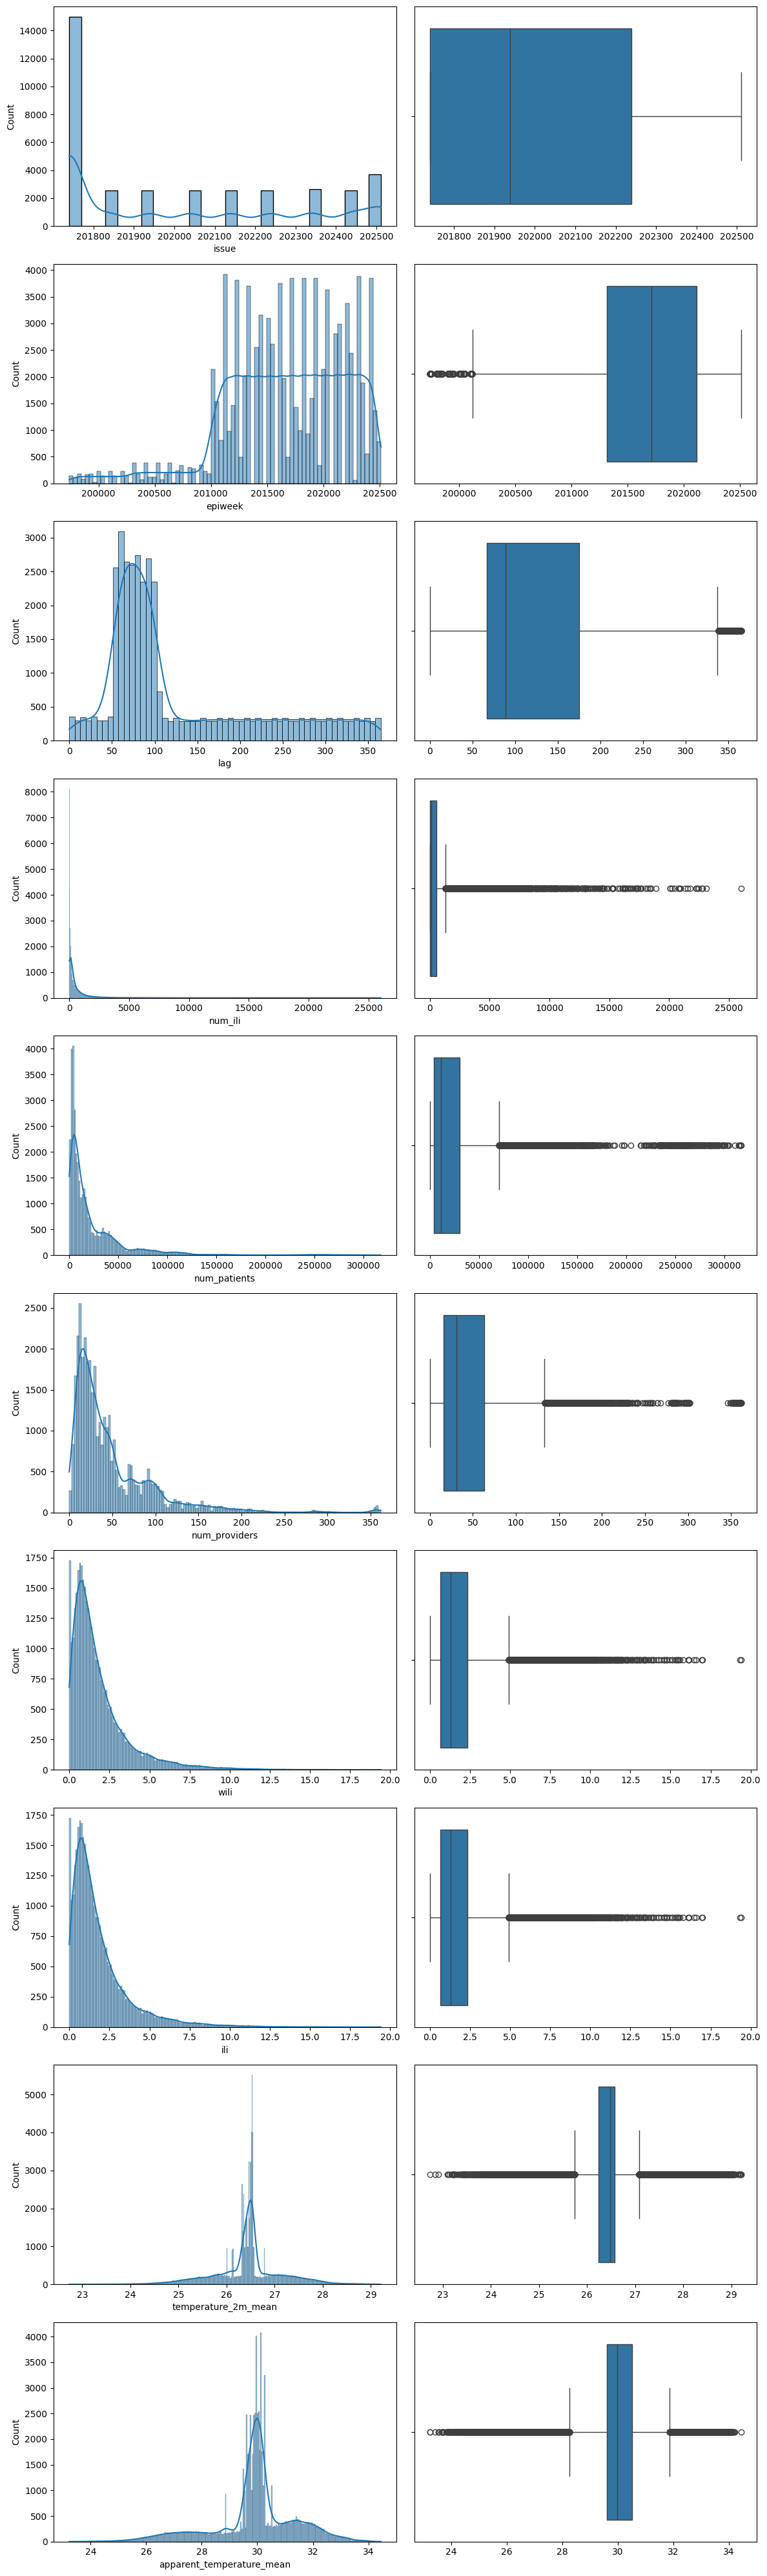

In [352]:
numeric_features = final_df.select_dtypes(include=["float64", "int64"]).columns

fig, ax = plt.subplots(len(numeric_features), 2, figsize=(12, 4 * len(numeric_features)))

for i, feature in enumerate(numeric_features):
    sns.histplot(ax=ax[i, 0], data=final_df, x=feature, kde=True)
    sns.boxplot(ax=ax[i, 1], data=final_df, x=feature).set(xlabel=None)

plt.tight_layout()
plt.show()

# Data Analysis Summary

## Issue
- **Histogram:** The distribution is heavily skewed toward higher values, indicating that most entries have elevated issue numbers. This could correlate with more recent epidemiological weeks.
- **Boxplot:** Reveals outliers on the lower end, which could indicate unusual or inconsistent entries. It might be worth validating these outliers.

## Epiweek
- **Histogram:** Displays an orderly distribution representing natural progression across epidemiological weeks (over years). It appears consistent with expectations.
- **Boxplot:** No significant outliers are visible, showing temporal continuity without disruptions.

## Lag
- **Histogram:** The data is concentrated toward lower values (between 0 and ~100 days). However, there is a long tail extending toward higher values, potentially indicating exceptional delays in data reporting.
- **Boxplot:** Exhibits several outliers on the higher end of the range. These might reflect specific regions or states with reporting delays.

## Num_ili and Num_patients
- **Histogram:** Both are skewed toward lower values, with fewer observations at the high end. This is typical for medical datasets where spikes are rare but impactful.
- **Boxplot:** Many outliers on the upper end indicate unusual or significant influenza-like illness activity in certain states or weeks.

## Num_providers
- **Histogram:** Displays a relatively uniform distribution with a slight concentration at lower values, suggesting that many states have a smaller number of reporting providers.
- **Boxplot:** Outliers in the higher range may correspond to larger states or areas with more robust healthcare systems.

## Wili and Ili
- **Histogram:** Both show skewed distributions toward lower values, with notable peaks in higher values, suggesting extraordinary spikes in influenza activity.
- **Boxplot:** Significant outliers highlight critical states or weeks during flu seasons.

## Temperature_2m_mean and Apparent_temperature_mean
- **Histogram:** The distributions center around reasonable ranges (26-29°C for mean temperatures), showing consistency between the two variables.
- **Boxplot:** Some extreme values at both ends. It may be worth verifying these observations for specific states with extreme climates.



---


### **Overall Conclusions**
- Most variables show skewed distributions, which is typical in medical and climate-related datasets.
- Significant outliers in the boxplots for `wili`, `num_ili`, and temperatures highlight critical states or weeks that may require additional attention.
- Temperatures appear well-distributed, with some extreme values likely tied to specific regions or states.


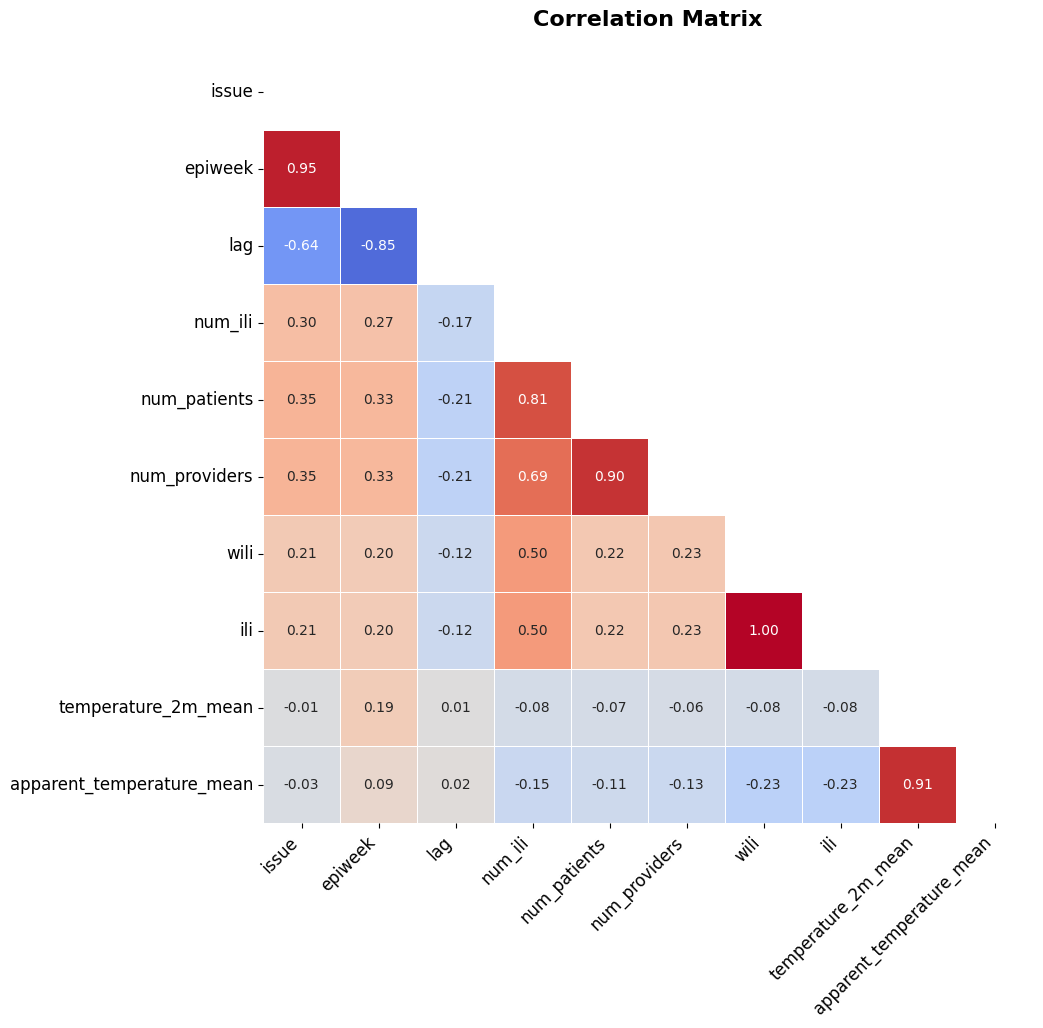

In [358]:
plt.figure(figsize=(12, 10))

corr_matrix = final_df.select_dtypes(include='number').corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix, 
    mask=mask,
    annot=True, 
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    square=True,
    cbar=False,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 10}
)

plt.title("Correlation Matrix", fontsize=16, fontweight="bold", pad=20)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)

plt.show()



# Correlation Matrix Analysis

## Key Variables:

### **`wili` (Weighted ILI):**
- **Positive Correlation:**
    - Strong correlation with variables like `num_ili` (0.50) and `ili` (0.23), as expected, since they are all related to flu activity.
- **Negative Correlation with Temperatures:**
    - `temperature_2m_mean` (-0.08)
    - `apparent_temperature_mean` (-0.23)  
    These suggest that flu cases tend to increase at lower temperatures, which is highly relevant for our analysis and prediction.

### **Temperatures:**
- **High Internal Correlation:**
    - `temperature_2m_mean` and `apparent_temperature_mean` show a very high correlation with each other (0.91), indicating they capture similar climatic information.
- **Moderate Negative Correlation with Flu Metrics:**
    - Both temperatures have moderate negative correlations with `wili` and `num_ili`, reinforcing the importance of climatic conditions in understanding flu spread.

### **`num_ili`, `num_patients`, and `num_providers`:**
- **Strong Internal Correlations:**
    - These three variables are highly correlated with each other (0.81 to 0.90) and serve as key indicators of flu activity.
- **Positive Correlation with `wili`:**
    - This indicates that the number of cases and reporting providers are closely linked to the severity of flu activity.

---

## Less Relevant Variables:

### **`issue` and `epiweek`:**
- **Strong Correlation Between Themselves:**
    - They are highly correlated (0.95) but show weaker correlations with flu metrics (`wili`, `ili`, etc.) and temperatures.
- **Temporal Importance:**
    - These variables might be more useful for temporal analysis than for directly influencing flu outbreaks.

---

## Model Implications:

### **Temperatures as Critical Predictors:**
- The correlations show that temperatures significantly influence flu activity. They will be essential for identifying climatic conditions that favor critical outbreaks.

### **Focus on Flu Activity Variables:**
- Variables such as `num_ili`, `wili`, and `num_patients` are highly correlated and reflect the severity of flu outbreaks. These will be key to understanding "how much" and "where" flu activity might occur.

### **Incorporating State Categories:**
- Although not reflected in the correlation matrix, states are essential for identifying regional differences. They can be included as categorical variables in the predictive model without cluttering the visualizations.


In [ ]:
model_df = final_df[["state", "epiweek", "wili", "temperature_2m_mean", "apparent_temperature_mean"]].dropna(axis=1, how="all")
model_df.head()

,state,epiweek,wili,temperature_2m_mean,apparent_temperature_mean
0,ak,201040,0.875146,26.781649,30.517718
1,ak,201041,1.128270,26.781649,30.517718
2,ak,201042,0.586042,26.781649,30.517718
3,ak,201043,0.967742,26.781649,30.517718
4,ak,201044,0.683851,26.781649,30.517718


In [ ]:
model_df.tail()

,state,epiweek,wili,temperature_2m_mean,apparent_temperature_mean
91227,wy,202500,NaN,27.944582,32.740875
91228,wy,202501,NaN,27.610416,31.967476
91229,wy,202502,NaN,27.556845,31.826761
91230,wy,202503,NaN,27.255655,31.149420
91231,wy,202504,NaN,27.184374,31.386020


In [ ]:
model_df = model_df.dropna(subset=["wili"])
print(model_df.shape)
print(model_df.head())


(36640, 5)
  state  epiweek      wili  temperature_2m_mean  apparent_temperature_mean
0    ak   201040  0.875146            26.781649                  30.517718
1    ak   201041  1.128270            26.781649                  30.517718
2    ak   201042  0.586042            26.781649                  30.517718
3    ak   201043  0.967742            26.781649                  30.517718
4    ak   201044  0.683851            26.781649                  30.517718


In [ ]:
model_df.to_csv("../data/processed/flu_train_data.csv", index=False, encoding='utf-8')